# Preprocessed Data

In [29]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r Y
%store -r le

In [30]:
x_train.shape

(6985, 40, 174)

# CRNN

## Model Design

In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Reshape
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = Y.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Reshape((128,-1)))
model.add(LSTM(128))


model.add(Dense(num_labels, activation='softmax'))

## Model Compilation

In [32]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [33]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 41, 64)       

## Model Training

In [34]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 72
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_crnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/72
6985/6985 [==============================] - 165s 24ms/step - loss: 1.7892 - accuracy: 0.3311 - val_loss: 2.0999 - val_accuracy: 0.2816

Epoch 00001: val_loss improved from inf to 2.09993, saving model to saved_models/weights.best.basic_crnn.hdf5
Epoch 2/72
6985/6985 [==============================] - 155s 22ms/step - loss: 1.4895 - accuracy: 0.4515 - val_loss: 1.9429 - val_accuracy: 0.3326

Epoch 00002: val_loss improved from 2.09993 to 1.94292, saving model to saved_models/weights.best.basic_crnn.hdf5
Epoch 3/72
6985/6985 [==============================] - 148s 21ms/step - loss: 1.3681 - accuracy: 0.4951 - val_loss: 1.8352 - val_accuracy: 0.3234

Epoch 00003: val_loss improved from 1.94292 to 1.83521, saving model to saved_models/weights.best.basic_crnn.hdf5
Epoch 4/72
6985/6985 [==============================] - 151s 22ms/step - loss: 1.2402 - accuracy: 0.5482 - val_loss: 1.4472 - val_accuracy: 0.4774

Epoch 00004: val_loss 

6985/6985 [==============================] - 161s 23ms/step - loss: 0.3759 - accuracy: 0.8649 - val_loss: 0.8252 - val_accuracy: 0.7396

Epoch 00037: val_loss did not improve from 0.59465
Epoch 38/72
6985/6985 [==============================] - 160s 23ms/step - loss: 0.3804 - accuracy: 0.8671 - val_loss: 0.6462 - val_accuracy: 0.7962

Epoch 00038: val_loss did not improve from 0.59465
Epoch 39/72
6985/6985 [==============================] - 163s 23ms/step - loss: 0.3518 - accuracy: 0.8800 - val_loss: 0.6248 - val_accuracy: 0.7934

Epoch 00039: val_loss did not improve from 0.59465
Epoch 40/72
6985/6985 [==============================] - 157s 22ms/step - loss: 0.3330 - accuracy: 0.8790 - val_loss: 0.9081 - val_accuracy: 0.7121

Epoch 00040: val_loss did not improve from 0.59465
Epoch 41/72
6985/6985 [==============================] - 165s 24ms/step - loss: 0.3559 - accuracy: 0.8764 - val_loss: 0.6502 - val_accuracy: 0.7905

Epoch 00041: val_loss did not improve from 0.59465
Epoch 42/72


## Testing the model

In [35]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
accuracy = 100*score[1]
print("Training Accuracy: %.4f%%" % accuracy)

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print("Testing Accuracy: %.4f%%" % accuracy)

Training Accuracy: 85.1539%
Testing Accuracy: 78.5346%


## Plotting the trained model

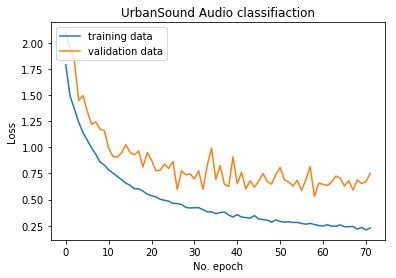

In [36]:
# Plot history: 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('UrbanSound Audio classifiaction')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()